# Unicorns: Where They Are, Industry Specialisation, and Rising Industries

### By Edward Eniang


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_excel(r"D:\unicornpj\2022-unicorns-python-analysis-main\unicorns-data.xlsx", usecols='A:G')
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China;SIG Asia Investments;Sin...
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,Founders Fund;Draper Fisher Jurvetson;Rothenbe...
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,Tiger Global Management;Sequoia Capital China;...
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures;LowercaseCapital;capitalG
4,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,Tiger Global Management;Insight Partners;DST G...
...,...,...,...,...,...,...,...
1186,LinkSure Network,1.0,2015-01-01,China,Shanghai,Mobile & telecommunications,NaN
1187,InMobi,1.0,2014-12-02,India,Bengaluru,Mobile & telecommunications,Kleiner Perkins Caufield & Byers;Softbank Corp...
1188,TechStyle Fashion Group,1.0,2014-08-29,United States,El Segundo,E-commerce & direct-to-consumer,Matrix Partners;Passport Capital;Rho Ventures
1189,Snapdeal,1.0,2014-05-21,India,New Delhi,E-commerce & direct-to-consumer,SoftBankGroup;Blackrock;Alibaba Group


In [3]:
#rename columns
df.rename(columns = {'Valuation ($B)': 'Valuation', 'Date Joined': 'Date', 'Select Investors': 'Investors'}, inplace=True)
df.index.name = 'id'
#drop FTX from the list because the company went bankrupt in Nov 2022
df = df.drop([9])

#assigning data types
df['City'] = df['City'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Industry'] = df['Industry'].astype('category')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df[['City', 'Country', 'Industry', 'Date']].dtypes

df

#investors data will be tidied up later

,Company,Valuation,Date,Country,City,Industry,Investors
id,,,,,,,
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China;SIG Asia Investments;Sin...
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,Founders Fund;Draper Fisher Jurvetson;Rothenbe...
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,Tiger Global Management;Sequoia Capital China;...
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures;LowercaseCapital;capitalG
4,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,Tiger Global Management;Insight Partners;DST G...
...,...,...,...,...,...,...,...
1186,LinkSure Network,1.0,2015-01-01,China,Shanghai,Mobile & telecommunications,NaN
1187,InMobi,1.0,2014-12-02,India,Bengaluru,Mobile & telecommunications,Kleiner Perkins Caufield & Byers;Softbank Corp...
1188,TechStyle Fashion Group,1.0,2014-08-29,United States,El Segundo,E-commerce & direct-to-consumer,Matrix Partners;Passport Capital;Rho Ventures


#### RQ1: In which industries and countries are unicorns concentrated?

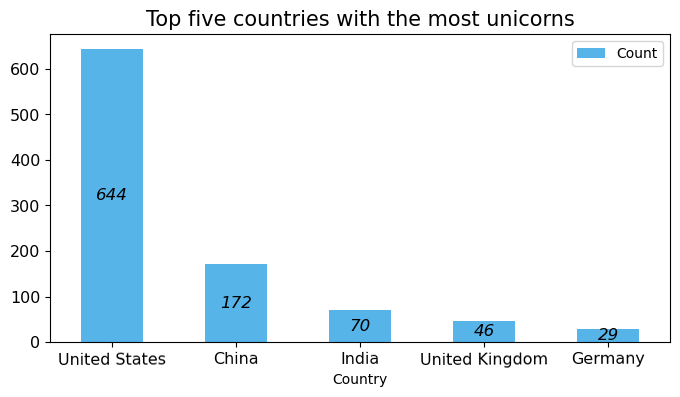

In [4]:
#number of unicorns by country
country = df['Country'].value_counts(dropna=True)
country = country.to_frame()
country = country.reset_index()
country.columns = ['Country','Count']
country['Country'] = country['Country'].astype('category')

#dataframe for top 5 countries
country = country.drop(country.index[5:])
country = country.set_index('Country')

#plot barh
ax = country.plot.bar(figsize=(8, 4), color='#56B4E9', fontsize=11.5, rot=0.3)
ax.set_xlabel('Country', fontsize='medium')
ax.set_title('Top five countries with the most unicorns', fontsize=15)

# for data values within bars
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12, fontstyle='oblique')


plt.show()

In [5]:
#Top five cities with the most unicorns
df['City'].value_counts(dropna=True).head()

City
San Francisco    169
New York         114
Beijing           62
Shanghai          44
London            36
Name: count, dtype: int64

In [6]:
#top cities in US
usa = df.loc[df['Country'] == 'United States']
(usa['City'].value_counts().head()*100/644).round(2)

City
San Francisco    26.24
New York         17.70
Boston            3.42
Palo Alto         3.11
Mountain View     2.64
Name: count, dtype: float64

In [7]:
#top cities in China
china = df.loc[df['Country'] == 'China']
(china['City'].value_counts().head()*100/172).round(2)

City
Beijing      36.05
Shanghai     25.58
Shenzhen     11.63
Hangzhou      9.30
Guangzhou     2.91
Name: count, dtype: float64

In [8]:
#top cities in United Kingdom
uk = df.loc[df['Country'] == 'United Kingdom']
(uk['City'].value_counts().head()*100/46).round(2)

City
London          78.26
Bristol          4.35
Gloucester       2.17
Peterborough     2.17
Colchester       2.17
Name: count, dtype: float64

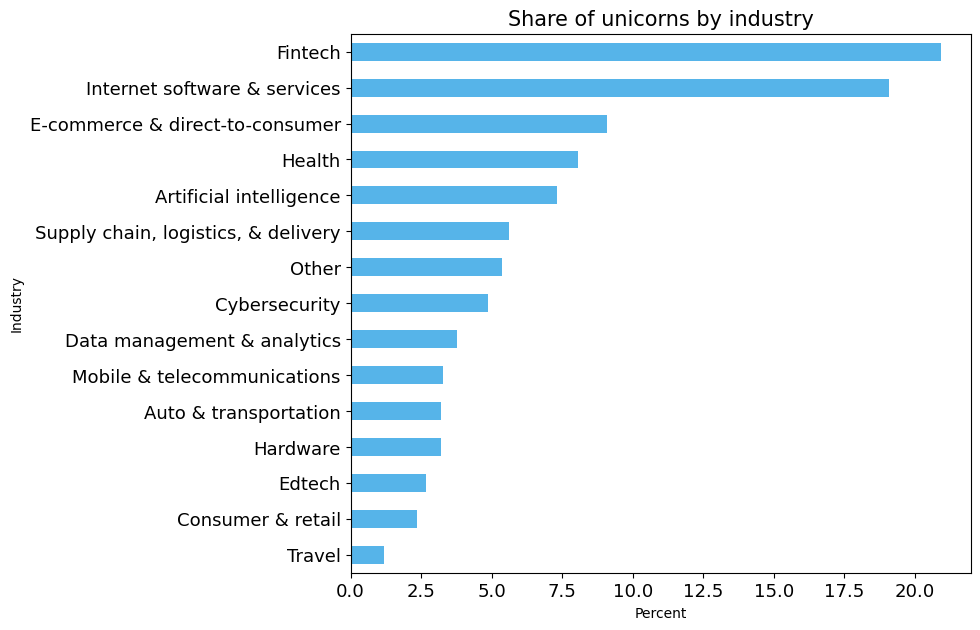

In [9]:
#plot number of unicorns by industry in percentage
ax = (df.Industry.value_counts()*100/1190).round(2).plot.barh(figsize=(8, 7), color='#56B4E9', fontsize=13)
ax.set_xlabel('Percent', fontsize='medium')
ax.set_title('Share of unicorns by industry', fontsize=15)
ax.invert_yaxis()

plt.show()

### RQ2: Do countries vary in terms of their top industries with the most unicorns?

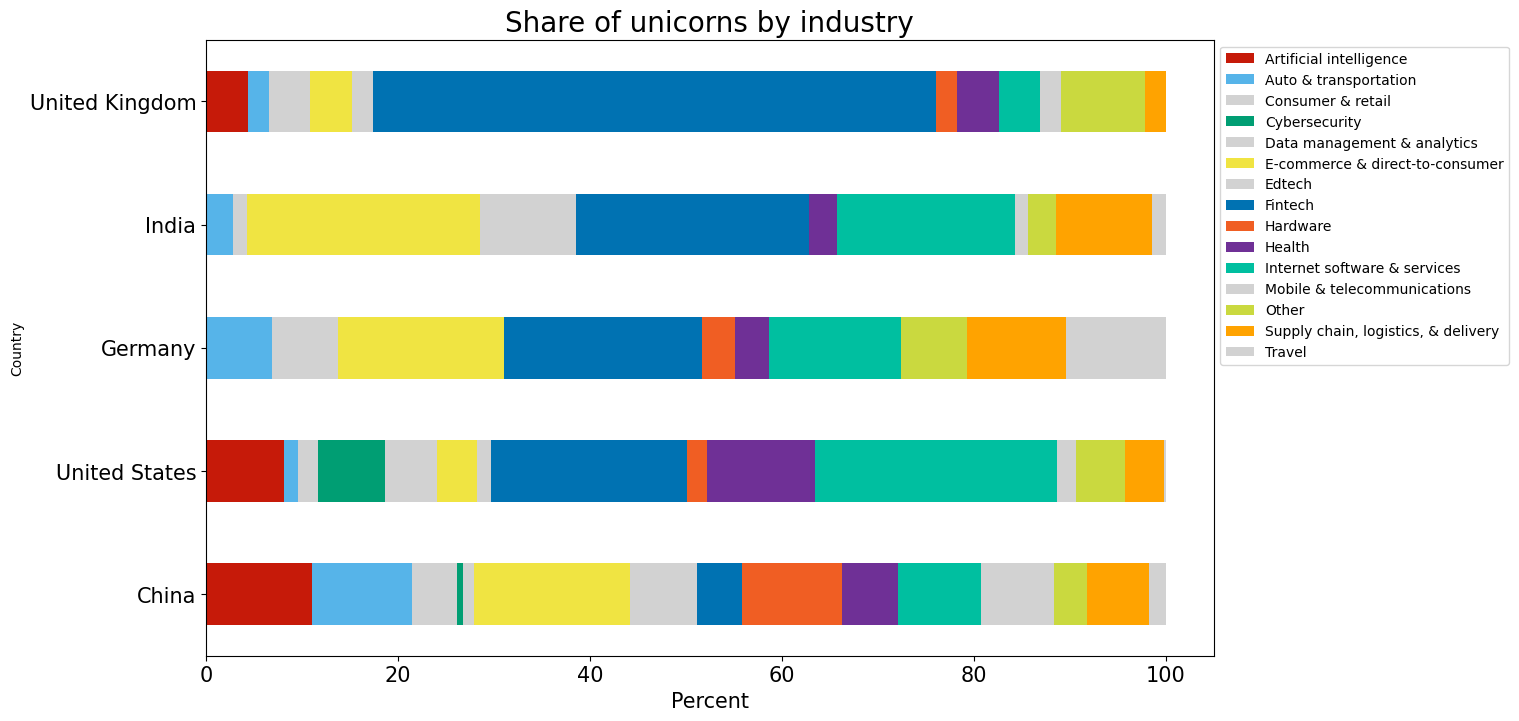

In [10]:
#crosstabulate country and industry
df2 = pd.crosstab(df['Country'], df['Industry'], normalize='index')

#narrow down to the top five countries' data
table = df2.loc[['United States', 'China', 'India', 'United Kingdom', 'Germany']]

# Sort by Fintech and convert to percentage.
table = table.sort_values(by='Fintech', ascending=False) * 100
colors = ['#C61A09', '#56B4E9', '#D2D2D2', '#009E73', '#D2D2D2', '#F0E442', '#D2D2D2', '#0072B2', '#F05E23', '#6F3096', '#00BFA0', '#D2D2D2', '#CAD93F', '#FFA300', '#D2D2D2']
ax = table.plot.barh(stacked=True, figsize=(13,8), fontsize=15, color=colors)
ax.invert_yaxis()
ax.set_title('Share of unicorns by industry', fontsize=20) 
ax.set_xlabel('Percent', fontsize=15)

# Place legend outside plot axes. 
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### RQ3: Do investors specialise in particular industries or countries?

In [11]:
#table showing the top ten investors and count of their investments by company, country and industry

table1 = {'Investors': ['Accel', 'Andreessen Horowitz', 'Tiger Global Management', 'Insight Partners', 'Sequoia Capital', 'Sequoia Capital China', 'General Catalyst', 'Lightspeed Venture Partners', 'SoftBank Group', 'Index Ventures'],
        'Count of investments': [65, 62, 57, 54, 52, 48, 41, 40, 36, 33],
          'Count of countries they invest in': [15, 7, 13, 11, 10, 9, 7, 5, 9, 10],
          'Count of industries they invest in': [11, 13, 13, 11, 12, 13, 12, 12, 11, 10]
        }

table1 = pd.DataFrame(table1)
table1.set_index('Investors', inplace=True)
table1

,Count of investments,Count of countries they invest in,Count of industries they invest in
Investors,,,
Accel,65,15,11
Andreessen Horowitz,62,7,13
Tiger Global Management,57,13,13
Insight Partners,54,11,11
Sequoia Capital,52,10,12
Sequoia Capital China,48,9,13
General Catalyst,41,7,12
Lightspeed Venture Partners,40,5,12
SoftBank Group,36,9,11


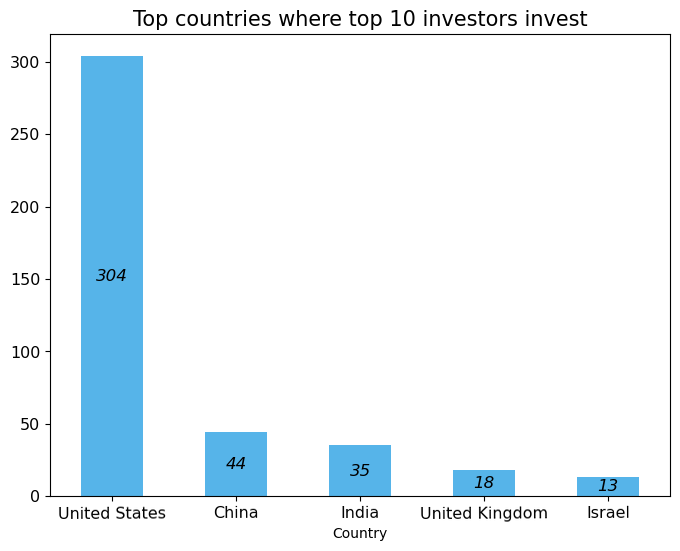

In [12]:
#tidying investors data
investors = df['Investors'].str.split(';', expand=True)
investors = investors.stack()
investors.name = 'investors'
investors = investors.astype('category')
investors.index.names = ['id', 'investor']
investors.head()

#create new dataframe showing where investors invest by company, country and industry
df3 = df[['Company', 'Country', 'Industry',]].join(investors)

#details about where top ten investors invest
subset = df3.reset_index().drop(columns=['id', 'investor']).set_index('investors')
subset = subset.loc[['Accel', 'Andreessen Horowitz', 'Tiger Global Management', 'Insight Partners', 'Sequoia Capital', 'Sequoia Capital China', 'General Catalyst', 'Lightspeed Venture Partners', 'SoftBank Group', 'Index Ventures']]

#plot top countries where top 10 investors invest
ax = subset.Country.value_counts().head().plot.bar(figsize=(8, 6), color='#56B4E9', fontsize=11.5, rot=0.3)
ax.set_title('Top countries where top 10 investors invest', fontsize=15)

# for data values within bars
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12, fontstyle='oblique')


plt.show()

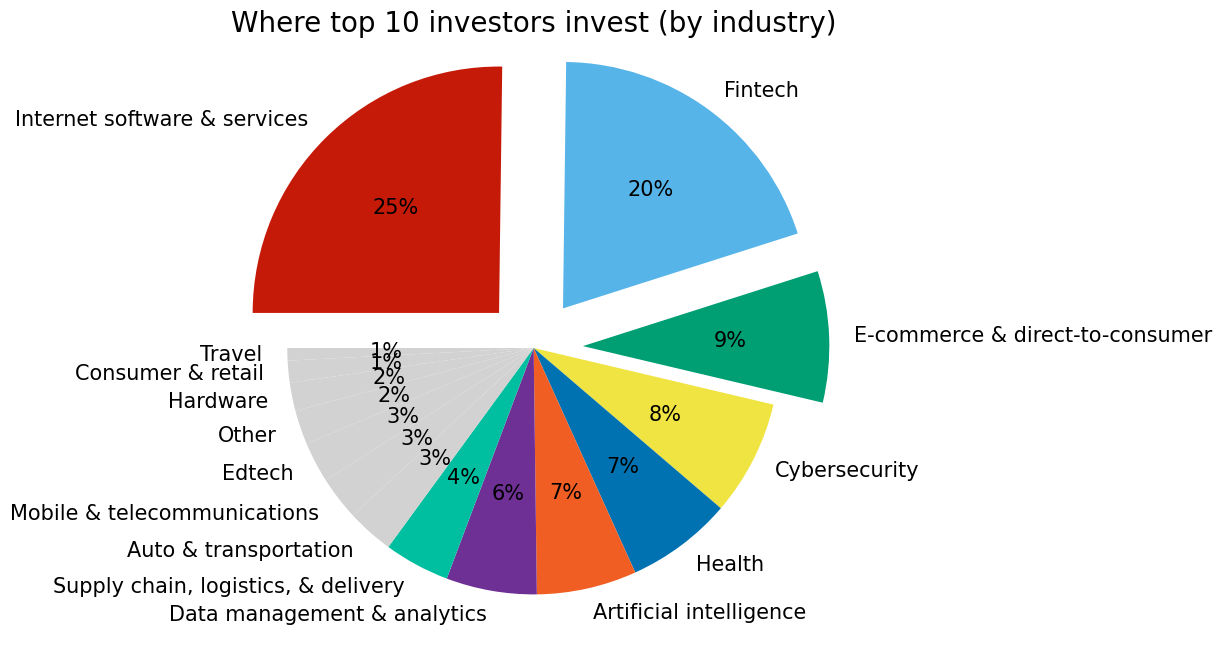

In [13]:
#plot top industries where top 10 investors invest
colors = ['#C61A09', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#F05E23', '#6F3096', '#00BFA0', '#D2D2D2', '#D2D2D2', '#D2D2D2', '#D2D2D2', '#D2D2D2', '#D2D2D2', '#D2D2D2']
explode = [0.2, 0.2, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

ax = subset['Industry'].value_counts().plot.pie(autopct='%1.0f%%',
                                       startangle=180,
                                       counterclock=False,
                                       figsize=(8,8),
                                       label='',
                                       textprops={'fontsize': 15},
                                       colors=colors,
                                       explode=explode,
                                       fontsize=15
                                      )
ax.set_title('Where top 10 investors invest (by industry)', fontsize=20)

plt.show()

In [14]:
#data about the cybersecurity industry
df4 = subset.groupby(['Industry', 'Country']).count().dropna()
df4.loc[['Cybersecurity']]

C:\Users\Prince\AppData\Local\Temp\ipykernel_10520\2547386478.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4 = subset.groupby(['Industry', 'Country']).count().dropna()


Company
Industry      Country                      
Cybersecurity Argentina                   0
              Australia                   0
              Austria                     0
              Belgium                     0
              Bermuda                     0
              Brazil                      0
              Canada                      1
              Chile                       0
              China                       0
              Colombia                    0
              Croatia                     0
              Czech Republic              0
              Denmark                     0
              Ecuador                     0
              Estonia                     0
              Finland                     0
              France                      0
              Germany                     0
              Hong Kong                   0
              India                       0
              Indonesia                   0
              Ireland                     0
              Israel                      8
              Italy                       0
              Japan                       0
              Lithuania                   1
              Luxembourg                  0
              Malaysia                    0
              Mexico                      0
              Netherlands                 0
              Nigeria                     0
              Norway                      0
              Philippines                 0
              Senegal                     0
              Seychelles                  0
              Singapore                   0
              South Africa                0
              South Korea                 0
              Spain                       0
              Sweden                      0
              Switzerland                 1
              Thailand                    0
              Turkey                      0
              United Arab Emirates        0
              United Kingdom              0
              United States              26
              Vietnam                     0

In [15]:
#table showing shows each investor’s top two countries and industries and their shares of investments in respective countries and industries as percentage of their total investments
table2 = {'Investors': ['Accel', 'Andreessen Horowitz', 'Tiger Global Management', 'Insight Partners', 'Sequoia Capital', 'Sequoia Capital China', 'General Catalyst', 'Lightspeed Venture Partners', 'SoftBank Group', 'Index Ventures'],
        'Country 1': ['United States', 'United States', 'United States', 'United States', 'United States', 'China', 'United States', 'United States', 'United States', 'United States'],
          'c1_%': [58.5, 90.3, 56.1, 61.1, 80.8, 79.2, 82.9, 80, 47.2, 57.6],
          'Country 2': ['India', 'Brazil', 'India', 'Israel', 'Israel', 'Australia', 'United Kingdom', 'India', 'India', 'France'],
          'c2_%': [13.8, 1.6, 21.1, 16.7, 3.8, 4.2, 4.9, 7.5, 19.4, 12.1],
          'Industry 1': ['Internet software & services', 'Internet software & services', 'Fintech', 'Internet software & services', 'Internet software & services', 'Artificial intelligence', 'Health', 'Internet software & services', 'E-commerce & direct-to-consumer', 'Internet software & services'],
          'i1_%': [30.8, 30.6, 33.3, 27.8, 25, 18.8, 22, 25, 25, 33.3],
          'Industry 2': ['Fintech', 'Fintech', 'Internet software & services', 'Fintech', 'Fintech', 'E-commerce & direct-to-consumer', 'Internet software & services', 'Cybersecurity', 'Auto & transportation', 'Fintech'],
          'i2_%': [23.1, 16.1, 28.1, 22.2, 17.3, 18.8, 22, 17.5, 16.7, 27.3]
        }

table2 = pd.DataFrame(table2)
table2.set_index('Investors', inplace=True)
table2

,Country 1,c1_%,Country 2,c2_%,Industry 1,i1_%,Industry 2,i2_%
Investors,,,,,,,,
Accel,United States,58.5,India,13.8,Internet software & services,30.8,Fintech,23.1
Andreessen Horowitz,United States,90.3,Brazil,1.6,Internet software & services,30.6,Fintech,16.1
Tiger Global Management,United States,56.1,India,21.1,Fintech,33.3,Internet software & services,28.1
Insight Partners,United States,61.1,Israel,16.7,Internet software & services,27.8,Fintech,22.2
Sequoia Capital,United States,80.8,Israel,3.8,Internet software & services,25.0,Fintech,17.3
Sequoia Capital China,China,79.2,Australia,4.2,Artificial intelligence,18.8,E-commerce & direct-to-consumer,18.8
General Catalyst,United States,82.9,United Kingdom,4.9,Health,22.0,Internet software & services,22.0
Lightspeed Venture Partners,United States,80.0,India,7.5,Internet software & services,25.0,Cybersecurity,17.5
SoftBank Group,United States,47.2,India,19.4,E-commerce & direct-to-consumer,25.0,Auto & transportation,16.7


### RQ4: What are the trends in the number of unicorns across different industries in 2014-2022?

True


C:\Users\Prince\AppData\Local\Temp\ipykernel_10520\2248614670.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = df5.groupby(['Year', 'Industry']).size().unstack(fill_value=0)


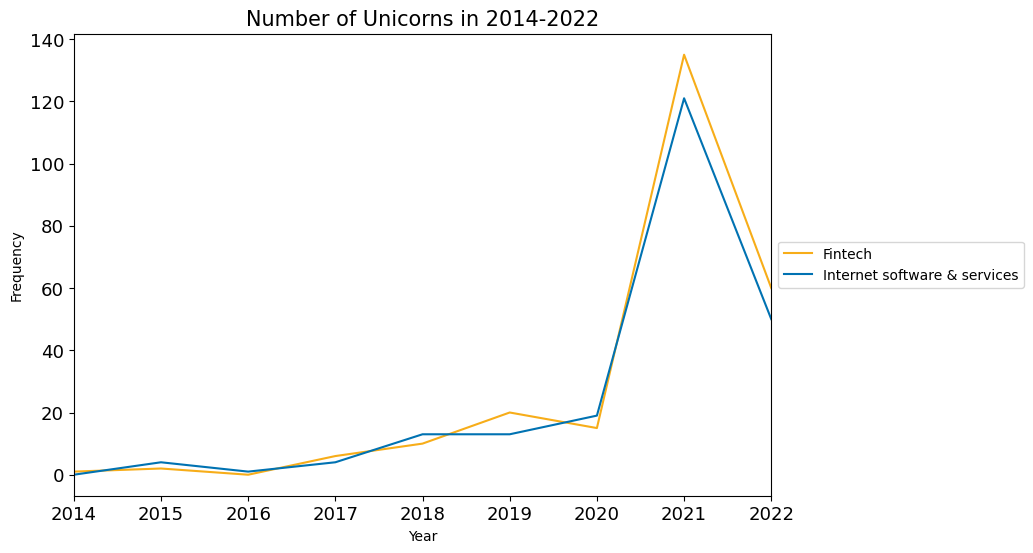

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Year and Industry columns only and create a new dataframe
df5 = pd.read_excel(
    r"D:\unicornpj\2022-unicorns-python-analysis-main\unicorns-data.xlsx", 
    usecols='C, F'
)

# Tidy data
df5.rename(columns={'Date Joined': 'Year'}, inplace=True)

# Set year as index and only display year value
df5.set_index('Year', inplace=True)
df5.index = pd.to_datetime(df5.index, format='%Y').to_period('Y')  # Convert to PeriodIndex
df5.sort_index(inplace=True)

# Check if the index is monotonic increasing
print(df5.index.is_monotonic_increasing)

# Set display options
pd.set_option('display.max_rows', 50)
df5['Industry'] = df5['Industry'].astype('category')

# Group data by Year and Industry and save as a new dataframe
table = df5.groupby(['Year', 'Industry']).size().unstack(fill_value=0)
table.columns.name = None
table = table.loc[(table != 0).any(axis=1)]

# Drop companies that joined the unicorn club in 2007 and 2011
table = table.drop(['2007', '2011'], errors='ignore')

# Plot number of fintech and internet startups from 2014 to 2022
subset1 = table.loc[
    ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    ['Fintech', 'Internet software & services']
]

ax = subset1.plot(grid=False, legend=True, color=['#F7AD19', '#0072B2'], figsize=(9, 6), fontsize=13)
ax.set_title('Number of Unicorns in 2014-2022', fontsize=15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


C:\Users\Prince\AppData\Local\Temp\ipykernel_10520\1192321304.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = df5.groupby(['Year', 'Industry']).size().unstack(fill_value=0)


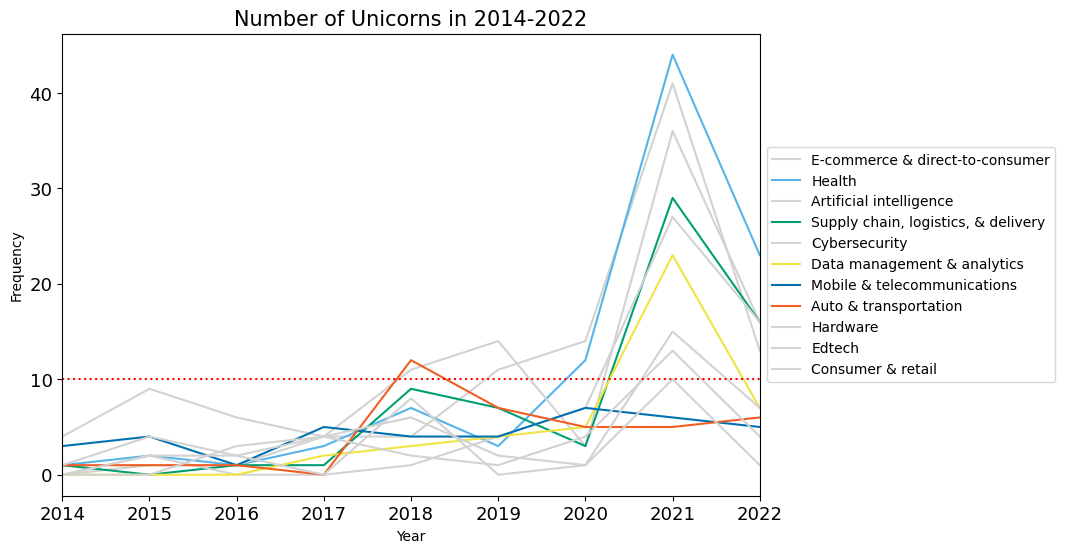

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Year and Industry columns only and create a new dataframe
df5 = pd.read_excel(
    r"D:\unicornpj\2022-unicorns-python-analysis-main\unicorns-data.xlsx", 
    usecols='C, F'
)

# Tidy data
df5.rename(columns={'Date Joined': 'Year'}, inplace=True)

# Set year as index and only display year value
df5.set_index('Year', inplace=True)
df5.index = pd.to_datetime(df5.index, format='%Y').to_period('Y')  # Convert to PeriodIndex
df5.sort_index(inplace=True)

# Set display options
pd.set_option('display.max_rows', 50)
df5['Industry'] = df5['Industry'].astype('category')

# Group data by Year and Industry and save as a new dataframe
table = df5.groupby(['Year', 'Industry']).size().unstack(fill_value=0)
table.columns.name = None
table = table.loc[(table != 0).any(axis=1)]

# Drop companies that joined the unicorn club in 2007 and 2011
table = table.drop(['2007', '2011'], errors='ignore')

# Ensure that the industry names are correct and match exactly with what is in your DataFrame
industries = ['E-commerce & direct-to-consumer', 'Health', 'Artificial intelligence', 'Supply chain, logistics, & delivery', 'Cybersecurity', 'Data management & analytics', 'Mobile & telecommunications', 'Auto & transportation', 'Hardware', 'Edtech', 'Consumer & retail']

# Filter the DataFrame for the relevant years
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
subset2 = table.loc[years]

# Filter columns to include only the specified industries
subset2 = subset2[industries]

# Define colors for plotting
colors = ['#D2D2D2', '#56B4E9', '#D2D2D2', '#009E73', '#D2D2D2', '#F0E442', '#0072B2', '#F05E23', '#D2D2D2', '#D2D2D2', '#D2D2D2']

# Plot the data
ax = subset2.plot(grid=False, legend=True, figsize=(9, 6), fontsize=13, color=colors)
ax.set_title('Number of Unicorns in 2014-2022', fontsize=15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add a horizontal line at y=10
plt.axhline(y=10, color='r', linestyle=':', label='Red Line')

plt.show()


## Appendices

In [18]:
#identifying top 10 investors and the number of investments they make
t10_inv = df3.groupby(['investors']).count()
t10_inv.reset_index(inplace=True)
t10_inv.sort_values(by='Industry',ascending=False).head(10)

# #number of unique companies where top ten investors invest - 424
# subset['Company'].value_counts().describe()

# #number of unique countries where top ten investors invest - 33
# country = subset['Country'].value_counts().dropna()
# country[country!=0].count()

C:\Users\Prince\AppData\Local\Temp\ipykernel_10520\2916912479.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t10_inv = df3.groupby(['investors']).count()


,investors,Company,Country,Industry
30,Accel,65,65,65
87,Andreessen Horowitz,62,62,62
1204,Tiger Global Management,57,57,57
633,Insight Partners,54,54,54
1060,Sequoia Capital,52,52,52
1061,Sequoia Capital China,48,48,48
511,General Catalyst,41,41,41
743,Lightspeed Venture Partners,40,40,40
1111,SoftBank Group,36,36,36
623,Index Ventures,33,33,33


In [19]:
#CODE TO FIND OUT INFO TO CREATE TABLE 1

#count of countries 'investor' invests in
tab1 = subset.groupby(['investors', 'Country']).count().dropna()
tab1.loc['Index Ventures'].count()

#count of industries 'investor' invests in
tab2 = subset.groupby(['investors', 'Industry']).count().dropna()
tab2.loc['Tiger Global Management'].count()

C:\Users\Prince\AppData\Local\Temp\ipykernel_10520\1126405121.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tab1 = subset.groupby(['investors', 'Country']).count().dropna()
C:\Users\Prince\AppData\Local\Temp\ipykernel_10520\1126405121.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tab2 = subset.groupby(['investors', 'Industry']).count().dropna()


Company    15
Country    15
dtype: int64

In [20]:
#CODE TO FIND OUT INFO TO CREATE TABLE 2

#identify top two countries 'investor' invests in
sub = tab1.loc[('Index Ventures', slice(None),),:]
(sub['Company'].nlargest(2)*100/sub['Company'].sum()).round(1)

#identify top two industries 'investor' invests in
sub = tab2.loc[('Index Ventures', slice(None),),:]
(sub['Company'].nlargest(2)*100/sub['Company'].sum()).round(1)

investors       Industry                    
Index Ventures  Internet software & services    33.3
                Fintech                         27.3
Name: Company, dtype: float64

In [23]:
# Load Year and Industry columns only and create a new dataframe
df5 = pd.read_excel(
    r"D:\unicornpj\2022-unicorns-python-analysis-main\unicorns-data.xlsx", 
    usecols='C, F'
)

# Tidy data
df5.rename(columns={'Date Joined': 'Year'}, inplace=True)

# Set year as index and only display year value
df5.set_index('Year', inplace=True)
df5.index = pd.to_datetime(df5.index, format='%Y').to_period('Y')  # Convert to PeriodIndex
df5.sort_index(inplace=True)

# Set display options
pd.set_option('display.max_rows', 50)
df5['Industry'] = df5['Industry'].astype('category')

# Group data by Year and Industry and save as a new dataframe
table = df5.groupby(['Year', 'Industry']).size().unstack(fill_value=0)
table.columns.name = None
table = table.loc[(table != 0).any(axis=1)]

# Drop companies that joined the unicorn club in 2007 and 2011
table = table.drop(['2007', '2011'], errors='ignore')

# Sum of unicorns that joined in 2022
sum_2022 = table.loc['2022'].sum()
print(f"Sum of unicorns that joined in 2022: {sum_2022}")

# Count of Fintech unicorns in 2022
count_fintech_2022 = table.loc['2022', 'Fintech']
print(f"Count of Fintech unicorns in 2022: {count_fintech_2022}")

# Count of Internet software & services unicorns in 2022
count_internet_2022 = table.loc['2022', 'Internet software & services']
print(f"Count of Internet software & services unicorns in 2022: {count_internet_2022}")

# Number of new unicorns in every industry in 2021
count_2021 = table.loc['2021']
print(f"Number of new unicorns in every industry in 2021:\n{count_2021}")


Sum of unicorns that joined in 2022: 238
Count of Fintech unicorns in 2022: 60
Count of Internet software & services unicorns in 2022: 50
Number of new unicorns in every industry in 2021:
Artificial intelligence                 36
Auto & transportation                    5
Consumer & retail                       10
Cybersecurity                           27
Data management & analytics             23
E-commerce & direct-to-consumer         41
Edtech                                  13
Fintech                                135
Hardware                                15
Health                                  44
Internet software & services           121
Mobile & telecommunications              6
Other                                   21
Supply chain, logistics, & delivery     29
Travel                                   3
Name: 2021, dtype: int64


C:\Users\Prince\AppData\Local\Temp\ipykernel_10520\2557012124.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = df5.groupby(['Year', 'Industry']).size().unstack(fill_value=0)
